![](https://www.kaggleusercontent.com/kf/22897395/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..3__gWnURfFhtMJOVl-WLeA.FLYaLXCwrfg60Pq06X1Nb5dL2tUiaRNh6p9KEKUAcqnodte__bchGsGl5MZdsc3jpO8sK5MbDFvBTlXclhWRu6HyOrBAE7cpY54kCtrmQEGvP4pG7pwjm513GKMes3bsoXruN1cnbNLGzgOetsiX5Krlt7ycMSGElm0j4IwBFvwHZLxrIWenjKsI4vAfEGlk5hBk7Je5dDwQ7AI0RgZsQ0D6DFgTp0zbyqizWhLZPzjcMjT6Na6_rIsExza96Som9I1k5vwZpOc65Y9y-j0IVKo2_ArG4YtymD-WkqYBFEMx5-W23E9eCvEKr0Dz_dc9PnoAwdmv59u0l083lzaEgWkLsF8ZFeGnraS9GhbbxWj4hNNDO-KQqcv0kdtYum2rSLhpDn3kRia6PapiQQ5zyq6JFMXr9SWwwhlD82kY71SSg3XdDfb0-SmvMHtjCaS2YcT9BUiYfLWtDEMUYlwpNMUS_vq8-fisyY-mNeB75TDgzXq6xkTEXZAyC4atfwxaVoLjM9SfX4tfwFvhkO0dLr1Xfwnsmbkeu95u1oebskW1vkZaqAIIv9dZzlWq0pzk73Gzci1Ov2QfE8QQkBD9kDOYA3dq8B0nge6YDYmiQxYQp8MpoBcHVhB43CyMGVIancrvqftApZ0DO6p1-sBAAg.GYr7J89H1F4aYwcMSPQgQg/__results___files/__results___2_0.png)

## using the original Understanding X Y Dir Orientation 
### added colors of the rusher, bigger arrow
### and rushing yards yellow arrow (corrected arrow direction) 
### added S = Weight of player
### added Inset of the play zoomed x2 



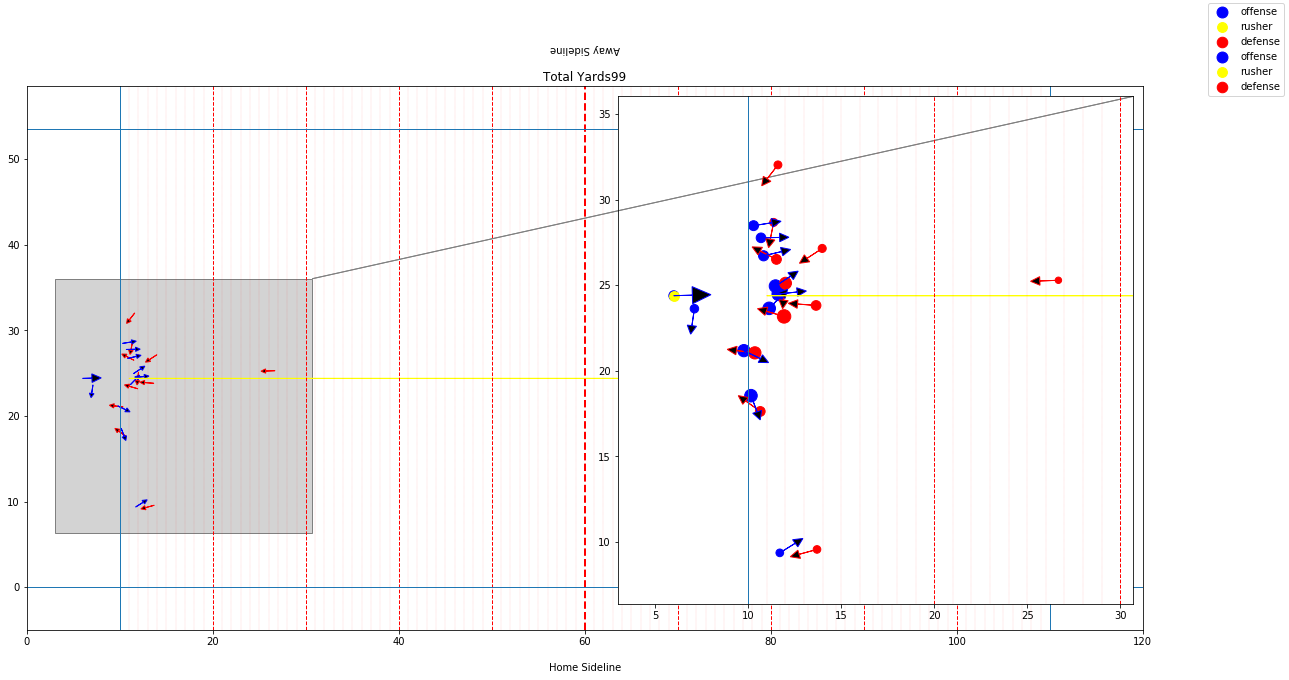

In [ ]:
import numpy as np
import pandas as pd
import getpass
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# ==== Setup =======================================================================================

np.set_printoptions(suppress=True)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 0)

# if getpass.getuser() in ['Ben']:
#     input_file = 'input/train.csv'
# else:
#     from kaggle.competitions import nflrush
#     env = nflrush.make_env()
input_file = '/kaggle/input/nfl-big-data-bowl-2020/train.csv'

# read train
train = pd.read_csv(filepath_or_buffer = input_file, low_memory = False)

In [ ]:
def plot_play(playId, arrows_as = 'Dir'):
    """
    Plot a single play
    :param playId: id of the play 
    :param arrows_as: should be either 'Dir' or 'Orientation'
    :return: plot of players with arrows
    """

    # Get 'play players' and 'play' from train
    play_players = train.loc[train.PlayId == playId].copy()
    play = play_players.iloc[[0]]

   # Determine which players are on offense by identifying which team the rusher is on
    rusher = play_players.loc[play_players.NflId == play_players.NflIdRusher]
    play_players.loc[:, 'PlayerOnOffense'] = play_players.Team.values == rusher.Team.values

    # Create field 'ArrowAngle'
    play_players['ArrowAngle'] = play_players['Dir'] if arrows_as == 'Dir' else play_players['Orientation']
    if (play.Season.values[0] == 2017 and arrows_as == 'Orientation'):
        play_players['ArrowAngle'] = (360 - play_players.ArrowAngle).mod(360)
    else:
        play_players['ArrowAngle'] = (360 - play_players.ArrowAngle + 90).mod(360)
    play_players['AbsoluteYardLine'] = play_players[['YardLine','PlayDirection','HomeTeamAbbr','PossessionTeam','FieldPosition']].apply(lambda x: 100-x['YardLine'] if x['PossessionTeam'] != x['FieldPosition'] else x['YardLine'],axis=1)

    # Create fields Arrow_dx, Arrow_dy
    play_players['X'] = play_players[['X','PlayDirection']].apply(lambda x: x['X'] if x['PlayDirection'] == 'right' else 120 - x['X'],axis=1)
    direction = 1 if play['PlayDirection'].values[0] == 'right' else -1
    play_players['Arrow_dx'] = np.cos(play_players.ArrowAngle * (np.pi/180))  * direction 
    play_players['Arrow_dy'] = np.sin(play_players.ArrowAngle * (np.pi/180))  * direction
    totalYards  = int(play['Yards']) 
    Z = totalYards + play_players['AbsoluteYardLine'].values[0] - (int(play_players.loc[play_players.NflId == play_players.NflIdRusher]['X'])-10)
    totalYards = Z




    # Split offense and defense players
    play_players_offense = play_players.loc[play_players.PlayerOnOffense].copy()
    play_players_rusher = play_players.loc[play_players.NflId == play_players.NflIdRusher].copy()
   # print(play_players_offense)
    play_players_defense = play_players.loc[~play_players.PlayerOnOffense].copy()

    # Plot
    #print(playId)
    fig, ax = plt.subplots(figsize=(20, 10))
    anchor = (0,0)
    loc = 1
    if  play_players_defense.X.min() > 60: loc =2
    axins = zoomed_inset_axes(ax, 2, loc=loc,borderpad=1) # zoom-factor: 2.5, location: upper-left


    ax.axvline(x=10, linewidth=1)
    ax.axvline(x=110, linewidth=1)
    axins.axvline(x=10, linewidth=1)
    axins.axvline(x=110, linewidth=1)
    
    # TEST 
    #ax.add_artist(w1)


    for i in range (11,110,1):
        w = 1 if i % 10 == 0 else .1
        if i==60: w = 2
        ax.axvline(x=i, linewidth=w,ls='--',c='red')
        axins.axvline(x=i, linewidth=w,ls='--',c='red')

        
    ax.axhline(y=0, linewidth=1)
    ax.axhline(y=53.5, linewidth=1)
    
    axins.axhline(y=0, linewidth=1)
    axins.axhline(y=53.5, linewidth=1)
    ax.scatter(play_players_offense.X, play_players_offense.Y, color="blue", label="offense", s = 30)
    ax.scatter(play_players_rusher.X, play_players_rusher.Y, color="yellow", label="rusher", s = 30  )
    ax.scatter(play_players_defense.X, play_players_defense.Y, color="red", label="defense", s = 30)

    for i in range(0, play_players.shape[0]):
     #   print play_players.NflId.values[i] , play_players.NflIdRusher, play_players.NflId.values[i] == play_players.NflIdRusher.values[i]
        ax.arrow(
            x = play_players.X.values[i],
            y = play_players.Y.values[i],
            dx = play_players.Arrow_dx.values[i],
            dy = play_players.Arrow_dy.values[i],
            head_width = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
            head_length = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
            fc= 'blue' if play_players['Team'].values[i] == 'home' else 'red',
            ec='blue' if play_players['Team'].values[i] == 'home' else 'red'
            
        )
        axins.arrow(
            x = play_players.X.values[i],
            y = play_players.Y.values[i],
            dx = play_players.Arrow_dx.values[i],
            dy = play_players.Arrow_dy.values[i],
            head_width = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
            head_length = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
            fc= 'blue' if play_players['Team'].values[i] == 'home' else 'red',
            ec='blue' if play_players['Team'].values[i] == 'home' else 'red'
            
        )
        
        
        if play_players.NflId.values[i] == play_players.NflIdRusher.values[i]:
            play_players.loc[play_players.NflId == play_players.NflIdRusher,'Arrow_dx'] = np.cos(play_players.ArrowAngle * (np.pi/180)) * totalYards * direction 
            play_players.loc[play_players.NflId == play_players.NflIdRusher,'Arrow_dy'] = np.sin(play_players.ArrowAngle * (np.pi/180)) * totalYards *  direction  * 0

            ax.arrow(
                x =  play_players['AbsoluteYardLine'].values[0] + 10 , 
                y = play_players.Y.values[i] ,
                dx = play_players.Arrow_dx.values[i] - play_players['AbsoluteYardLine'].values[0] - 10 - (int(play_players.loc[play_players.NflId == play_players.NflIdRusher]['X'])-10),
                dy = play_players.Arrow_dy.values[i]  ,
                head_width = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
                head_length = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
                fc= 'yellow' if play_players.NflId.values[i] == play_players.NflIdRusher.values[i] else  'black',
                ec='yellow' if play_players.NflId.values[i] == play_players.NflIdRusher.values[i] else ('blue' if play_players['Team'].values[i] != 'home' else 'red'))
            axins.arrow(
                x =  play_players['AbsoluteYardLine'].values[0] + 10 , 
                y = play_players.Y.values[i] ,
                dx = play_players.Arrow_dx.values[i] - play_players['AbsoluteYardLine'].values[0] - 10 - (int(play_players.loc[play_players.NflId == play_players.NflIdRusher]['X'])-10),
                dy = play_players.Arrow_dy.values[i]  ,
                head_width = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
                head_length = 1 if (play_players.NflId.values[i] == play_players.NflIdRusher.values[i]) else .5,
                fc= 'yellow' if play_players.NflId.values[i] == play_players.NflIdRusher.values[i] else  'black',
                ec='yellow' if play_players.NflId.values[i] == play_players.NflIdRusher.values[i] else ('blue' if play_players['Team'].values[i] != 'home' else 'red'))

            
    ax.text(60, 0 - 10, 'Home Sideline', horizontalalignment='center', verticalalignment='bottom')
    ax.text(60, 53.5 + 10, 'Away Sideline', horizontalalignment='center', verticalalignment='top', rotation=180)
    ax.set_xlim(0, 120)
    ax.set_ylim(0 - 5, 53.5 + 5)
    
    x1, x2, y1, y2 = 10, 20, 1, 30 # specify the limits
    axins.scatter(play_players_offense.X, play_players_offense.Y, color="blue", s = play_players_offense.PlayerWeight-150)
    axins.scatter(play_players_rusher.X, play_players_rusher.Y, color="yellow", label="rusher", s = play_players_rusher.PlayerWeight-150  )
    axins.scatter(play_players_defense.X, play_players_defense.Y, color="red", label="defense", s = play_players_defense.PlayerWeight-150 )

    axins.set_xlim(play_players_offense.X.min()-3, play_players_defense.X.max()+4) # apply the x-limits
    axins.set_ylim(play_players_offense.Y.min()-3, play_players_defense.Y.max()+4) # apply the x-limits
    mark_inset(ax, axins, loc1=1, loc2=1, fc='white', ec="0.5")



    #ax.set_title("PlayId: {play.PlayId.values[0]} (moving {play.PlayDirection.values[0]})\n{arrows_as}")
    ax.set_title( "Total Yards"+str(int(play['Yards']) ))
    fig.legend()
    fig.show()
    




In [ ]:
# Derrick Henry, 2018, moving right, https://www.youtube.com/watch?v=tlZvgdcIXvI
plot_play(20181206001238, 'Orientation')

In [ ]:
# Lamar Miller, 2018, moving left, https://www.youtube.com/watch?v=p-ptA3nQxCA
plot_play(20181126001222, 'Orientation')

In [ ]:
# Nick Chubb, 2018, moving left, https://www.youtube.com/watch?v=NvQiykZIBNA
plot_play(20181111022155, 'Orientation')

In [ ]:
# Adrian Peterson, 2018, moving left, https://www.youtube.com/watch?v=AMLKvNs2Ec8
plot_play(20181203001224, 'Orientation')

In [ ]:
# Leonard Fournette, 2017, moving right, https://youtu.be/Dp3zkB3NRDA?t=114
plot_play(20171008074020, 'Orientation')

In [ ]:
# Melvin Gordon, 2017, moving right, https://www.youtube.com/watch?v=oUHaQKmyn7U
plot_play(20171029030426, 'Orientation')

In [ ]:
# Bilal Powell, 2017, moving left, https://www.youtube.com/watch?v=zDtDanILhAc
plot_play(20171001080397, 'Orientation')

In [ ]:
# Saquon Barkley, 2018, moving left, https://www.youtube.com/watch?v=E4IesbDwpq4
plot_play(20181209081494, 'Orientation')

In [ ]:
# Kerryon Johnson, 2018, moving right, https://youtu.be/cgZnUFAtd0c?t=27
plot_play(20181021060782, 'Orientation')

In [ ]:
# Alvin Kamara, 2017, moving right, https://www.youtube.com/watch?v=4XAYJKiT2rc
plot_play(20171126070740, 'Orientation')

In [ ]:
train